In [74]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

import samples.fashion.fashion as fashion

%matplotlib inline


In [32]:
config = fashion.FashionConfig()
FASHION_DIR = os.path.join(ROOT_DIR, "\\Mask_RCNN\\")

In [33]:
DATASET_DIR = os.path.abspath("dataset")
print(DATASET_DIR)
dataset = fashion.FashionDataset()
dataset.load_fashion(DATASET_DIR, "val")

dataset.prepare()
print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

/Users/daegukim/PycharmProjects/ts_img/Mask_RCNN/dataset
Image Count: 32153
Class Count: 14
  0. BG                                                
  1. short sleeve top                                  
  2. long sleeve top                                   
  3. short sleeve outwear                              
  4. long sleeve outwear                               
  5. vest                                              
  6. sling                                             
  7. shorts                                            
  8. trousers                                          
  9. skirt                                             
 10. short sleeve dress                                
 11. long sleeve dress                                 
 12. vest dress                                        
 13. sling dress                                       


[28136 30070 19549 19018] [4]


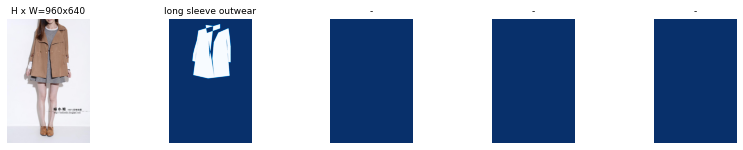

[28136 30070 19549 19018] [1]


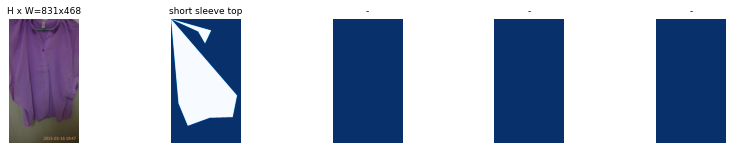

[28136 30070 19549 19018] [4]


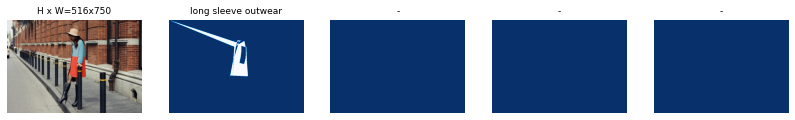

[28136 30070 19549 19018] [11]


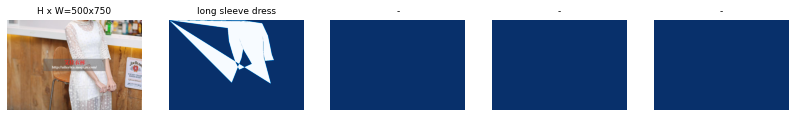

In [39]:
image_ids = np.random.choice(dataset.image_ids, 4)
image_ids
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, num_ids = dataset.load_mask(image_id)
    print(image_ids, num_ids)
    visualize.display_top_masks(image, mask, num_ids, dataset.class_names)

image_id  17131 /Users/daegukim/PycharmProjects/ts_img/Mask_RCNN/dataset/val/013848.jpg
image                    shape: (702, 468, 3)         min:    0.00000  max:  255.00000  uint8
mask                     shape: (702, 468, 1)         min:    0.00000  max:    1.00000  uint8
num_ids                  shape: (1,)                  min:   11.00000  max:   11.00000  int32
bbox                     shape: (1, 4)                min:    7.00000  max:  490.00000  int32


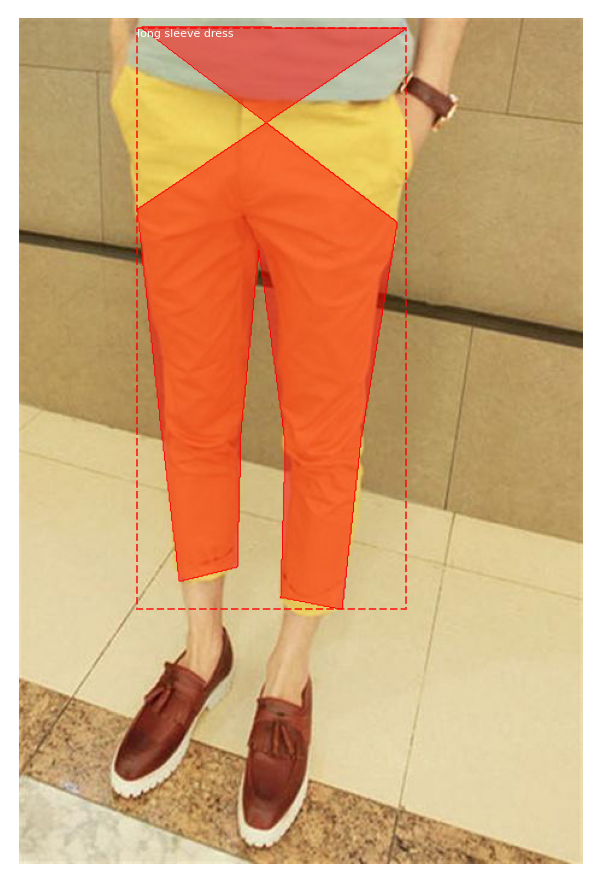

In [43]:
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)

bbox = utils.extract_bboxes(mask)

print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("num_ids", num_ids)
log("bbox", bbox)

visualize.display_instances(image, bbox, mask, num_ids, dataset.class_names)

